# mWig40 - Portfolio Management Strategies (Analysis)

In [1]:
# Loading the packages
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 100

In [4]:
dataset = pd.read_csv('mWig40FULLINDEX.csv')
dataset = dataset.set_index('Data')

In [6]:
dataset.shape

(6914, 40)

In [7]:
dataset[:5]

,11B,AMC,ASE,ATT,BDX,BFT,BHW,BML,BNP,CAR,...,MAB,MBK,MIL,MRC,NEU,PKP,PLW,TEN,WPL,XTB
Data,,,,,,,,,,,,,,,,,,,,,
1992-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A lot of missing values in the majority of the companies. Most of these were included in the index fairly recently, especially the gaming companies such as 11Bit, or Ten Square Games. This will certainly be problematic, but let's see if we can find a workaround and get some information from this dataset

<AxesSubplot:title={'center':'Correlation Matrix'}>

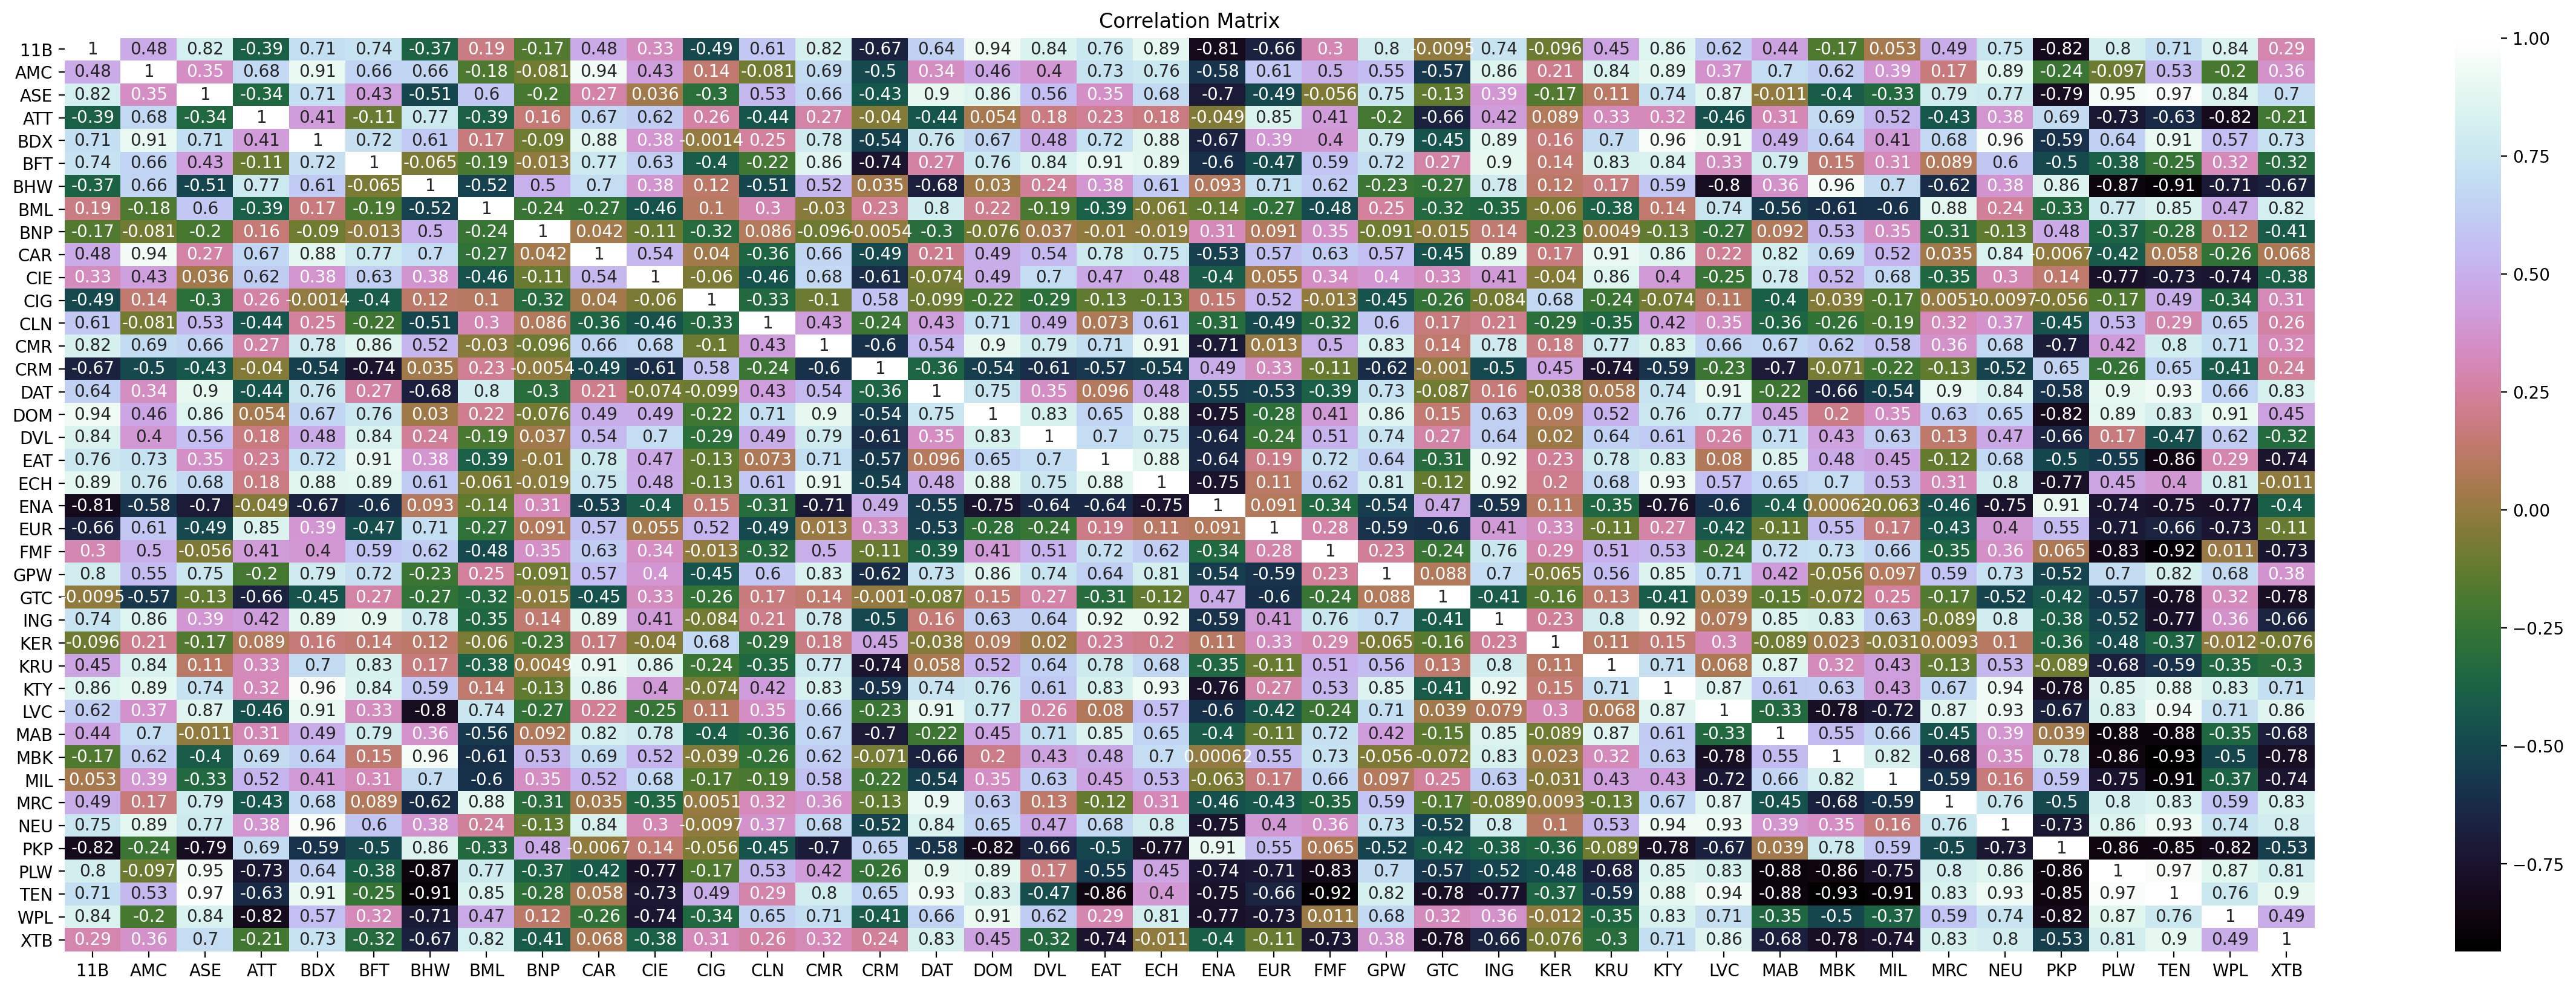

In [52]:
correlation = dataset.corr()
plt.figure(figsize = (30, 10))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax = 1, annot = True, cmap = 'cubehelix')

The plot above shows the correlation between each and every company that is in the mWig40 index. Very interesting, there is some positive correlation between the companies, but it seems that most of the daily returns for these companies are negatively correlated with each other. What caught my attention was the 94% positive correlation between 11b (gaming company) and DOM (a real estate developer). I am not entirely convinced that, given these results, a PCA would allow us to represent this dataset in less dimensions AND at the same time retain majority of the information. Let's see:

### Data Preparation

In [53]:
print(f"Dataset shape: {dataset.shape}")

Dataset shape: (6914, 40)


In [66]:
print(f"Null values: {dataset.isnull().values.any()}")
print(f"Null values sum: {dataset.isnull().values.sum()}")

Null values: True
Null values sum: 136583


In [78]:
print(f"Percentage of null values for each component: \n{dataset.isnull().mean()}")

Percentage of null values for each component: 
11B    0.629158
AMC    0.152300
ASE    0.633208
ATT    0.543101
BDX    0.069280
BFT    0.662135
BHW    0.144923
BML    0.674284
BNP    0.664304
CAR    0.400202
CIE    0.420741
CIG    0.522997
CLN    0.843795
CMR    0.206393
CRM    0.553515
DAT    0.708273
DOM    0.482933
DVL    0.507087
EAT    0.428985
ECH    0.100665
ENA    0.557275
EUR    0.420596
FMF    0.474689
GPW    0.629303
GTC    0.392392
ING    0.029216
KER    0.522129
KRU    0.647237
KTY    0.094880
LVC    0.752965
MAB    0.623518
MBK    0.002603
MIL    0.001880
MRC    0.741250
NEU    0.414232
PKP    0.737055
PLW    0.844084
TEN    0.900202
WPL    0.791148
XTB    0.829621
dtype: float64


Most of these companies have a lot of missing data. I'll have to adjust the 'cut-off' point accordingly, but I can already see that removing the companies, even with the threshold set at a level of 60%, would remove most of the information that is necessary. I am going to proceed with this analysis and apply PCA, but at this point I can see that there won't be enough valuable info that could be used as a basis for the portfolio management strategy.

### Removing missing values

In [80]:
missing_fractions = dataset.isnull().mean().sort_values(ascending = False)
drop_list = list(sorted(missing_fractions[missing_fractions > 0.6].index))

Seventeen companies fit the criteria of more than 60% of missing values. These are listed below.

In [83]:
drop_list

['11B',
 'ASE',
 'BFT',
 'BML',
 'BNP',
 'CLN',
 'DAT',
 'GPW',
 'KRU',
 'LVC',
 'MAB',
 'MRC',
 'PKP',
 'PLW',
 'TEN',
 'WPL',
 'XTB']